# Semester 1 Capstone Project (Group-4-0206)
## Company: Computing Vision

#### This notebook was a collaborative effort by the following group participants.
#### Richmond Addo Danquah, Zommi Yao-Bai, Matt Frost, Scott Hills

##### Project presentation date: Mar-03-2023

# Project Overview

For this project, you will use exploratory data analysis and statistical methods to generate insights for a business stakeholder.

## Business Understanding (Problem)

Computing Vision (a made-up company for the purposes of this project) sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t have much background in creating movies. You are charged with exploring what types of films are currently doing the best at the box office using different samples of available data. You then will translate those findings into actionable insights that the head of Computing Vision's new movie studio can use to help decide what type of films to create.

### Objective / Goals

The final analysis of the business problem should yield three concrete business recommendations for Computing Vision. Two recommendations based on your data communication and understanding and at least one recommendation following statistical testing.

## Data Understanding

Data for the project has been provided by the following sources:
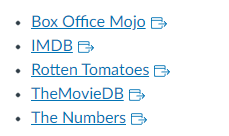

Because it was collected from various locations, the different files have different formats. Some are compressed CSV (comma-separated values) or TSV (tab-separated values) files, while the data from IMDB has been provided in a SQLite database.

# Exploratory Data Analysis, Cleanup and Preparation

###### Let's import the important python libraries that may be needed for  EDA.

In [5]:
#Libraries Imported
import pandas as pd
import numpy as np

import datetime
from datetime import datetime

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from scipy.stats import pearsonr
import sqlite3 #import sqlite 3 module
import os
import warnings

Map the directories to open and read the data files.

In [101]:
# Reading the CSV files into the instance
 # - Converted the TSV files to CSV Files
DATA_DIR = "../../Data/original_data/"

FILE_NAME1 = "bom.movie_gross.csv"
FILE_NAME2 = "tmdb.movies.csv"
FILE_NAME3 = "tn.movie_budgets.csv"
FILE_NAME4 = "rt_movie_info.csv"
FILE_NAME5 = "rt_reviews.csv"

BOM_movies_gross = pd.read_csv(f"{DATA_DIR}{FILE_NAME1}", index_col=0)
TMDB_movies = pd.read_csv(f"{DATA_DIR}{FILE_NAME2}")
TN_movie_budgets = pd.read_csv(f"{DATA_DIR}{FILE_NAME3}", index_col=0)
RT_movie_info = pd.read_csv(f"{DATA_DIR}{FILE_NAME4}")


In [ ]:
# Pandas functions for EPA

# df.head()         #Returns the first rows (Default 5) of the dataset
# df.tail()         #Returns the last rows (Default 5) of the dataset
# df.info()         # Getting a quick overviewd of the dataset
# df.shape()        # Shows the number of dimesions as well as the size of each dimension.
# df.size()         # Return an int representing the number of elements in the objects (Rows x Columns)
# df.ndim()         # Returns dimension of dataframe/series (1 for one dimension {series}, 2 for two deimensions {dataframe})
# df.describe()     #Return a statistical summary for the numerical columns present in the dataset.
# df.sample()       # used to generate a sample randomly either row or column. 
# df.isnull().sum() # checking for missing/null/na values in the data
# df.nunique()      # Return number of unique elements in the object
# df.columns()      # Returns the column lables of the dataframe
# df.value_counts() # Used to get a series contianing counts of unique values

### 1. Box Office Mojo

####   -----Analysing, Data Cleansing and Preparation

We will be using manual inspection via Excel and the use of Pandas functions to review and clean data set where necessary.

##### bom.movies_gross.csv details
- Data file has 3387 rows with 5 columns
- The columns are : title', 'studio', 'domestic_gross', 'foreign_gross', 'year'
- There are instance of null data values, but the key column of 'title' is not missing any values. 
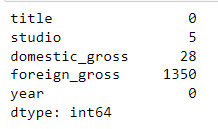
- There are no duplicate values for the key column 'title'
- We could choose to change foreign_gross and domestic gross data type to int.
- We will assume that the domestic and foreign gross revenue are in us dollars.
- The Studio column values are abbreviate, but due to lack of time we will not try to lookup and replace with the full studio names.

##### Conclusion:  This table will be heavily utilized to refrence Studio, Revenue and release year data elements for individual movie titles.

In [92]:
# BOM_movies_gross.head()
# BOM_movies_gross.tail()
# BOM_movies_gross.info() 
# BOM_movies_gross.describe()
# BOM_movies_gross.sample()  
BOM_movies_gross.isnull().sum()
# BOM_movies_gross.nunique()     
# BOM_movies_gross.value_counts()

studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [16]:
BOM_movies_gross.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [ ]:
# Sample ways to change formats if required.
#new_bom_movies['domestic_gross']=  BOM_movies_gross['domestic_gross'].astype(int) # Changing data type to Int
#new_bom_movies['year']= pd.to_datetime(bom_movies.year, format='%Y%') # Changing data type to date

<Figure size 720x432 with 0 Axes>

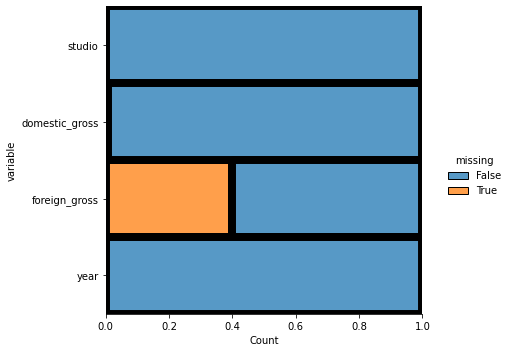

In [70]:
# Visualizing data for missing value
plt.figure(figsize=(10,6))
sns.displot(
    data= BOM_movies_gross.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
BOM_movies_gross.image = plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

### 2. IMDB

In [21]:
# Connecting to the db file
dbfile ="../../Data/im_combined.db"

# Create a SQL connection to our SQLite database
conn = sqlite3.connect(dbfile)

# reading all table names
SQLQuery_SQLite_Master= """ 
SELECT name FROM sqlite_master WHERE type = 'table'
;""" 
df_sql_tables = pd.read_sql(SQLQuery_SQLite_Master, conn) 
df_sql_tables

# **Note - Only the IMDB_ tables were provided in the source database. The other tables were created manually 
#    from the csv source files. 

,name
0,IMDB_movie_basics
1,IMDB_directors
2,IMDB_known_for
3,IMDB_movie_akas
4,IMDB_movie_ratings
5,IMDB_persons
6,IMDB_principals
7,IMDB_writers
8,BOM_movie_gross
9,movie_reviews


In [102]:
# We can write SQL against the database to do many of the same checks that we can use in Pandas.
# df.head()
# df.tail()
# df.info() 
# df.describe()
# df.sample()  

SQLQuery_1= """ 
select * 
from IMDB_movie_basics a
;""" 
IMDB_movie_bases_df = pd.read_sql(SQLQuery_1, conn) 

## Using pandas to check the SQL results loaded into a datafram
# IMDB_movie_bases_df.head()
# IMDB_movie_bases_df.tail()
# IMDB_movie_bases_df.info() 
IMDB_movie_bases_df.describe()
# IMDB_movie_bases_df.value_counts()


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


In [106]:
# checking for duplicate key values for IMDB movie_basics table.
SQLQuery_IMDB2 = """ 
select 
a.movie_id,
a.primary_title
,count(*)
from IMDB_movie_basics a
group by a.primary_title
having count(*) > 1
order by count(*) desc
;""" 
IMDB_movie_bases_df2 = pd.read_sql(SQLQuery_IMDB2, conn) 
IMDB_movie_bases_df2


,movie_id,primary_title,count(*)
0,tt2075392,Home,24
1,tt1848871,The Return,20
2,tt1441940,Broken,20
3,tt1618376,Homecoming,16
4,tt10274594,Alone,16
...,...,...,...
6177,tt1869226,100% Love,2
6178,tt8032828,100 Milioni di bracciate,2
6179,tt3180640,10 Minutes,2
6180,tt6085916,(aguirre),2


In [ ]:
# Be sure to close the connection when complete
#con.close()

####   -----Analysing, Data Cleansing and Preparation

We will be using manual inspection via SQLite DB Viewer, Excel and the use of Pandas functions to review and clean data set where necessary.

##### IMDB SQLite Database details

   
##### Conclusion:  This database contains a good amount of data and will be heavily utilized for average ratings, genre and individual personalities data.  We will use SQL to exclude the data that we can't use.


### 3. The Numbers

####   -----Analysing, Data Cleansing and Preparation

We will be using manual inspection via Excel and the use of Pandas functions to review and clean data set where necessary.

##### tn.movie_budgets details
- Data file has 5782 rows with 6 columns
- The columns are : id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross'
- There is null data values in the file.
- There are a duplicate values for the key column 'movie', but instead of removing them here we will handle in SQL when we load this raw data to a DB Table.
- The release_date column data type needs to be changed to datetime
- We will assume that the production_budget, domestic_growth and worldwide_gross are in us dollars.
   - We should format these 3 columns as interger in the CSV to remove the currency symbol and have it loaded into the a new database table as an ingeger.
   
##### Conclusion:  This table will be heavily utilized to produce Revenue, Cost and Profitablity values.


In [64]:
# TN_movie_budgets.head()
# TN_movie_budgets.tail()
# TN_movie_budgets.info() 
TN_movie_budgets.describe()
# TN_movie_budgets.sample()  
# TN_movie_budgets.isnull().sum()
# TN_movie_budgets.nunique()     
# TN_movie_budgets.value_counts()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
count,5782,5782,5782,5782,5782
unique,2418,5698,509,5164,5356
top,"Dec 31, 2014",Halloween,"$20,000,000",$0,$0
freq,24,3,231,548,367


### 4. TheMovie DB

####   -----Analysing, Data Cleansing and Preparation

We will be using manual inspection via Excel and the use of Pandas functions to review and clean data set where necessary.

##### tmdb.movies details
- Data file contains 26517 rows and 10 columns.
- The columns are named : 'Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title','popularity', 'release_date', 'title', 'vote_average', 'vote_count'
- This is a fully populated file and does not contain any null values to consider.
- There are a duplicate values for the key column 'movie', but instead of removing them here we will handle in SQL when we load this raw data to a DB Table.
- We will have to use either the original_title or title as the key to join to other datasets.
- The release_date column data type is already set and formatted as a date. In a SQLite table this will be formatted as text.
- We don't have any refrence of a scale of a popularity score column. We will have to assume the larger the numerical score value correlates to higher popularity. (bigger is better)
- Genre_ids are shows as numerical values and we have not translation refrence to what Genre titles those ID values relate to.
   
   
##### Conclusion:  We don't belive that we can make full use of this dataset, but will pick and choose items like popularity to use as a reference for a correlation between higer profit/revenue = higher popularity value


In [108]:
# TMDB_movies.head()
# TMDB_movies.tail()
# TMDB_movies.info() 
# TMDB_movies.describe()
# TMDB_movies.sample()  
# TMDB_movies.isnull().sum()
TMDB_movies.nunique()     
# TMDB_movies.value_counts()

Unnamed: 0           26517
genre_ids             2477
id                   25497
original_language       76
original_title       24835
popularity            7425
release_date          3433
title                24688
vote_average            91
vote_count            1693
dtype: int64

### 5. Rotten Tomatoes

####   -----Analysing, Data Cleansing and Preparation

We will be using manual inspection via Excel and the use of Pandas functions to review and clean data set where necessary.



##### rt_movie_info  file details
- Data file has 1560 rows with 12 columns.
- The columns are named : 'id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio'
- Other than Id column, the rest of the data columns contain missing/null values.
   - The ID columns makes it easy to join the two RT files together, but we don't have a way to joing this data to other data sources.
- The columns that have more than 2/3rd of missing values would be potential candidates to be dropped. 
        Studio
        box_office
        currency
- Columns that would need to have the formats updated. 
    - runtime column data type needs to be changed to datetime
    - rating columns to integer
    - Production_budget, domestic_gross and worldwide_gross should all be float with easy to read data values

   
##### Initial Conclusion:  It doesn't appear that we can rely on these files and we have the mostly the same, and more reliable and complete, data in other data source files. No good reliable way to join the RT data sets to other data sources.


In [65]:
# RT_movie_info.head()
# RT_movie_info.tail()
# RT_movie_info.info() 
# RT_movie_info.describe()
# RT_movie_info.sample()  
# RT_movie_info.isnull().sum()
RT_movie_info.nunique()     
# RT_movie_info.value_counts()

id              1560
synopsis        1497
rating             6
genre            299
director        1125
writer          1069
theater_date    1025
dvd_date         717
currency           1
box_office       336
runtime          142
studio           200
dtype: int64

## Final Data Structures
This is a view of our DB Schema with the tables created using the CSV and TSV files.

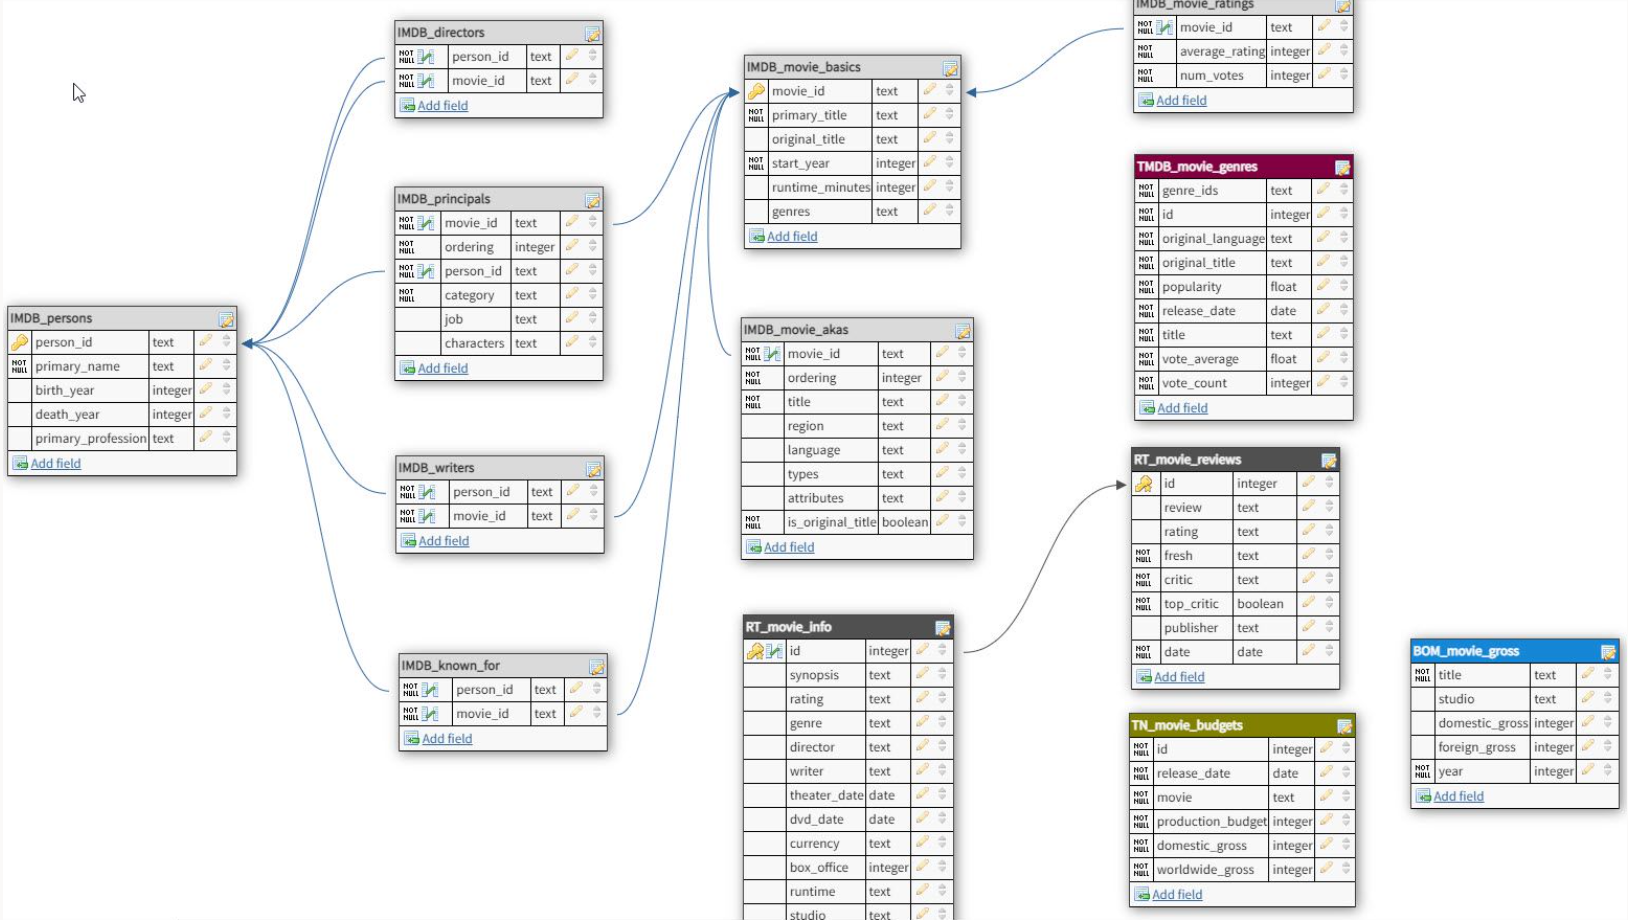

In [100]:
# Use SQL CREATE TABLE to construct a new table to hold combined data from the other datasets for a quick way to query
# and return the population of data needed to support our 3 business recommendations.

SQLQuery_Crate_View_table = """
CREATE TABLE "VIEW_movie_budgets" (
"Title" TEXT,
"studio" TEXT,
"TNWorlwideGross" INTEGER,
"TNDomesticGross" INTEGER,
"ComputedForeignGross" INTEGER,
"TNBudget/Cost" INTEGER,
"Computed_Profit_Loss" INTEGER,
"year" INTEGER,
"release_date" TEXT
);"""
# pd.read_sql(SQLQuery_Populate_View, conn) 

# conn.commit()

In [110]:
# Construct and run this sql statement to join the 3 datasets of  Box office movies, The numbers and the movie basics record from the
#IMDB database.

SQLQuery_Populate_View = """ 
Select 
DISTINCT
imdb.movie_id
,tn.movie 'Title'
,bom.studio
,imdb.genres
,tn.worldwide_gross 'TN Worlwide Gross'
,tn.domestic_gross 'TN Domestic Gross'
,(tn.worldwide_gross - tn.domestic_gross) as 'Computed Foreign Gross'
,tn.production_budget 'TN Budget / Cost'
,(tn.worldwide_gross - tn.production_budget) as 'Computed_Profit_Loss'
,bom.year
,tn.release_date
,(select a.average_rating from IMDB_movie_ratings a where imdb.movie_id = a.movie_id ) as 'IMDB Average Rating'
from TN_movie_budgets_formatted tn,
BOM_movie_gross bom, 
IMDB_movie_basics imdb
where 1=1
and bom.title = tn.movie
and imdb.primary_title = tn.movie
;""" 
VIEW_table_df = pd.read_sql(SQLQuery_Populate_View, conn) 

VIEW_table_df.describe()
VIEW_table_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1602 entries, 0 to 1601
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   movie_id                1602 non-null   object 
 1   Title                   1602 non-null   object 
 2   studio                  1602 non-null   object 
 3   genres                  1576 non-null   object 
 4   TN Worlwide Gross       1602 non-null   int64  
 5   TN Domestic Gross       1602 non-null   int64  
 6   Computed Foreign Gross  1602 non-null   int64  
 7   TN Budget / Cost        1602 non-null   int64  
 8   Computed_Profit_Loss    1602 non-null   int64  
 9   year                    1602 non-null   int64  
 10  release_date            1602 non-null   object 
 11  IMDB Average Rating     1413 non-null   float64
dtypes: float64(1), int64(6), object(5)
memory usage: 150.3+ KB


In [109]:
# SQL Query Select from the create View table 

SQLQuery_View_Movie_Budgets = """ 
select * from VIEW_movie_budgets
order by TNWorlwideGross desc
;""" 
VIEW_movie_budgets = pd.read_sql(SQLQuery_View_Movie_Budgets, conn) 

VIEW_movie_budgets.head(15)


,Title,studio,TNWorlwideGross,TNDomesticGross,ComputedForeignGross,TNBudget/Cost,Computed_Profit_Loss,year,release_date
0,Avengers: Infinity War,BV,2048134200,678815482,1369318718,300000000,1748134200,2018,4/27/2018
1,Jurassic World,Uni.,1648854864,652270625,996584239,215000000,1433854864,2015,6/12/2015
2,Furious 7,Uni.,1518722794,353007020,1165715774,190000000,1328722794,2015,4/3/2015
3,Avengers: Age of Ultron,BV,1403013963,459005868,944008095,330600000,1072413963,2015,5/1/2015
4,Black Panther,BV,1348258224,700059566,648198658,200000000,1148258224,2018,2/16/2018
5,Jurassic World: Fallen Kingdom,Uni.,1305772799,417719760,888053039,170000000,1135772799,2018,6/22/2018
6,Frozen,BV,1272469910,400738009,871731901,150000000,1122469910,2013,11/22/2013
7,Incredibles 2,BV,1242520711,608581744,633938967,200000000,1042520711,2018,6/15/2018
8,The Fate of the Furious,Uni.,1234846267,225764765,1009081502,250000000,984846267,2017,4/14/2017
9,Iron Man 3,BV,1215392272,408992272,806400000,200000000,1015392272,2013,5/3/2013


In [91]:
# Using the View Table we can use subselects to bring in other data elements from different data sources that couldn't be access
# by joining in the main select because we would sacrifice our total row count of moview rows we have with out selecte population
# 1255 total movie rows.

SQLQuery_VeiwSumm = """ 
Select 
a.*
,(Select b.genres from IMDB_movie_basics b where b.primary_title = a.title) as Genres
,(Select SUBSTR(e.genres,1,INSTR(e.genres,',') -1) from IMDB_movie_basics e where e.primary_title = a.title ) as 'Main_Genres'
,(Select c1.average_rating from IMDB_movie_basics b1, IMDB_movie_ratings c1 where  c1.movie_id = b1.movie_id and b1.primary_title = a.title) as AverageRating
,(Select d1.popularity from TMDB_movie_genres d1 where d1.original_title = a.title) as TN_Popularity
,(Select x_pers1.primary_name from IMDB_movie_basics x_basics1, IMDB_principals x_prin1, IMDB_persons x_pers1 where x_prin1.movie_id = x_basics1.movie_id and x_prin1.person_id = x_pers1.person_id and x_prin1.category = 'producer' 
 and x_basics1.primary_title = a.title ORDER BY x_prin1.ordering LIMIT 1) as 'Producer'
,(Select x_pers1.primary_name from IMDB_movie_basics x_basics1, IMDB_principals x_prin1, IMDB_persons x_pers1 where x_prin1.movie_id = x_basics1.movie_id and x_prin1.person_id = x_pers1.person_id and x_prin1.category = 'director' 
 and x_basics1.primary_title = a.title ORDER BY x_prin1.ordering LIMIT 1 ) as 'Director'
,(Select x_pers1.primary_name from IMDB_movie_basics x_basics1, IMDB_principals x_prin1, IMDB_persons x_pers1 where x_prin1.movie_id = x_basics1.movie_id and x_prin1.person_id = x_pers1.person_id and x_prin1.category in ('actor','actress')
 and x_basics1.primary_title = a.title ORDER BY x_prin1.ordering LIMIT 1) as 'Actor'
from VIEW_movie_budgets a
order by Computed_Profit_Loss desc
;""" 
VIEW_summary_final_df = pd.read_sql(SQLQuery_VeiwSumm, conn) 

VIEW_summary_final_df.head()
# VIEW_summary_final_df.tail()
# VIEW_summary_final_df.info() 

,Title,studio,TNWorlwideGross,TNDomesticGross,ComputedForeignGross,TNBudget/Cost,Computed_Profit_Loss,year,release_date,Genres,Main_Genres,AverageRating,TN_Popularity,Producer,Director,Actor
0,Avengers: Infinity War,BV,2048134200,678815482,1369318718,300000000,1748134200,2018,4/27/2018,"Action,Adventure,Sci-Fi",Action,8.5,80.773,None,Anthony Russo,Robert Downey Jr.
1,Jurassic World,Uni.,1648854864,652270625,996584239,215000000,1433854864,2015,6/12/2015,"Action,Adventure,Sci-Fi",Action,7.0,20.709,Patrick Crowley,Colin Trevorrow,Chris Pratt
2,Furious 7,Uni.,1518722794,353007020,1165715774,190000000,1328722794,2015,4/3/2015,"Action,Crime,Thriller",Action,7.2,20.396,Michael Fottrell,James Wan,Vin Diesel
3,Black Panther,BV,1348258224,700059566,648198658,200000000,1148258224,2018,2/16/2018,"Action,Adventure,Sci-Fi",Action,7.3,2.058,Kevin Feige,Ryan Coogler,Chadwick Boseman
4,Jurassic World: Fallen Kingdom,Uni.,1305772799,417719760,888053039,170000000,1135772799,2018,6/22/2018,"Action,Adventure,Sci-Fi",Action,6.2,34.958,Belén Atienza,J.A. Bayona,Chris Pratt


# Business Recommendations / Visulizations / Statistical Analysis

In [114]:
# Libraries import
import datetime
from datetime import datetime
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import pearsonr
import sqlite3 #import sqlite 3 module
import os
import ast
import warnings
warnings.filterwarnings("ignore")
import seaborn as sb
from scipy.stats import chi2_contingency 
import numpy as np
import scipy.stats as stats

In [116]:
# Query data into a pandas dataframe (df)
conn = sqlite3.connect('../../Data/im_combined.db')

SQLQuery_2 = """
Select
a.*
,(Select b.genres from IMDB_movie_basics b where b.primary_title = a.title) as Genres
,(Select c1.average_rating from IMDB_movie_basics b1, IMDB_movie_ratings c1 where c1.movie_id = b1.movie_id and b1.primary_title = a.title) as AverageRating

from VIEW_movie_budgets a


;"""

df = pd.read_sql(SQLQuery_2,conn)
df.head()  # First 5 rows to give a sense of what the data is like

,Title,studio,TNWorlwideGross,TNDomesticGross,ComputedForeignGross,TNBudget/Cost,Computed_Profit_Loss,year,release_date,Genres,AverageRating
0,10 Cloverfield Lane,Par.,108286422,72082999,36203423,5000000,103286422,2016,3/11/2016,"Drama,Horror,Mystery",7.2
1,12 Strong,WB,71118378,45819713,25298665,35000000,36118378,2018,1/19/2018,"Action,Drama,History",6.6
2,12 Years a Slave,FoxS,181025343,56671993,124353350,20000000,161025343,2013,10/18/2013,"Biography,Drama,History",8.1
3,127 Hours,FoxS,60217171,18335230,41881941,18000000,42217171,2010,11/5/2010,"Adventure,Biography,Drama",7.6
4,13 Hours: The Secret Soldiers of Benghazi,Par.,69411370,52853219,16558151,50000000,19411370,2016,1/15/2016,None,NaN


In [117]:
print(df.shape) # sample size is 1255 with 11 columns
print(df.duplicated().sum()) # check for duplicated rows- we dont expect to have this issue. there are no duplicates- good

(1255, 11)
0


In [118]:
# rename the columns to make it easier to understand
df = df.rename(columns={"Computed_Profit_Loss": "Profit", "TNBudget/Cost": "Costs", "year": "Release Year", 
                        "AverageRating": "Average Ratings","studio" : 'Studio', "Title" : "Movie", 
                        "TNWorlwideGross":"Total Gross Revenue", "TNDomesticGross":"Domestic Gross Revenue", 
                        "ComputedForeignGross":"Foreign Gross Revenue","release_date":"Release Date"})

In [120]:
df.describe() # This is very difficult to make meaning into, eg, year should not be here and the numbers are not easy to read

,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Average Ratings
count,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1.255000e+03,1255.000000,1160.000000
mean,1.539185e+08,6.142703e+07,9.249151e+07,4.759606e+07,1.063225e+08,2013.572112,6.445517
std,2.354813e+08,8.492840e+07,1.584311e+08,5.611265e+07,1.947030e+08,2.544849,0.962443
min,1.242000e+03,0.000000e+00,0.000000e+00,5.000000e+04,-1.104502e+08,2010.000000,1.600000
25%,1.932979e+07,8.144488e+06,6.310566e+06,1.000000e+07,2.684770e+06,2011.000000,5.900000
50%,6.596775e+07,3.368099e+07,2.827263e+07,2.750000e+07,3.373596e+07,2013.000000,6.500000
75%,1.732233e+08,7.561850e+07,9.999483e+07,6.000000e+07,1.198253e+08,2016.000000,7.100000
max,2.048134e+09,7.000596e+08,1.369319e+09,4.106000e+08,1.748134e+09,2018.000000,9.200000


In [121]:
# Convert all the float that are important to us to integers
df['Total Gross Revenue']= df['Total Gross Revenue'].astype(int)
df['Costs']= df['Costs'].astype(int)
df['Profit']= df['Profit'].astype(int)

In [122]:
df['Costs'].dtype

dtype('int32')

In [123]:
# Lets make the numbers esy to read by dividing by a million
df['Total Gross Revenue'] = df['Total Gross Revenue']/1000000
df['Domestic Gross Revenue'] = df['Domestic Gross Revenue']/1000000
df['Foreign Gross Revenue'] = df['Foreign Gross Revenue']/1000000
df['Costs'] = df['Costs']/1000000
df['Profit'] = df['Profit']/1000000

In [124]:
# Convert all the float that are important to us to integers
df['Total Gross Revenue']= df['Total Gross Revenue'].astype(int)
df['Costs']= df['Costs'].astype(int)
df['Profit']= df['Profit'].astype(int)

In [125]:
# numbers look easy to read now 
df.describe()

,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Average Ratings
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1160.000000
mean,153.420717,61.427029,92.491506,47.533865,106.023904,2013.572112,6.445517
std,235.475195,84.928398,158.431136,56.144737,194.579876,2.544849,0.962443
min,0.000000,0.000000,0.000000,0.000000,-110.000000,2010.000000,1.600000
25%,19.000000,8.144488,6.310566,10.000000,2.000000,2011.000000,5.900000
50%,65.000000,33.680992,28.272632,27.000000,33.000000,2013.000000,6.500000
75%,172.500000,75.618505,99.994832,60.000000,119.500000,2016.000000,7.100000
max,2048.000000,700.059566,1369.318718,410.000000,1748.000000,2018.000000,9.200000


In [126]:
# check to see the data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Movie                   1255 non-null   object 
 1   Studio                  1254 non-null   object 
 2   Total Gross Revenue     1255 non-null   int32  
 3   Domestic Gross Revenue  1255 non-null   float64
 4   Foreign Gross Revenue   1255 non-null   float64
 5   Costs                   1255 non-null   int32  
 6   Profit                  1255 non-null   int32  
 7   Release Year            1255 non-null   int64  
 8   Release Date            1255 non-null   object 
 9   Genres                  1156 non-null   object 
 10  Average Ratings         1160 non-null   float64
dtypes: float64(3), int32(3), int64(1), object(4)
memory usage: 93.3+ KB


<Figure size 720x432 with 0 Axes>

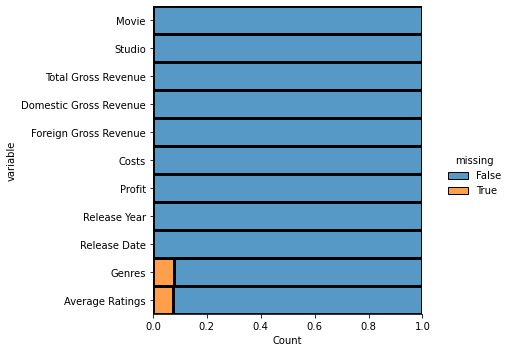

In [127]:
# Visualizing data for missing value
# As you can see, there are  missing values in 2 of the columns: genres, average ratings
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

array([[<AxesSubplot:title={'center':'Total Gross Revenue'}>,
        <AxesSubplot:title={'center':'Domestic Gross Revenue'}>,
        <AxesSubplot:title={'center':'Foreign Gross Revenue'}>],
       [<AxesSubplot:title={'center':'Costs'}>,
        <AxesSubplot:title={'center':'Profit'}>,
        <AxesSubplot:title={'center':'Release Year'}>],
       [<AxesSubplot:title={'center':'Average Ratings'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

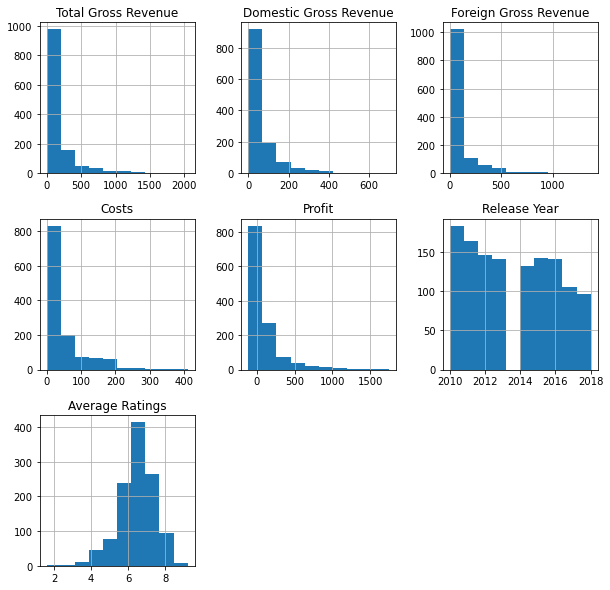

In [128]:
df.hist(figsize=(10,10)) # histogram to visualize the distribution of the data

In [129]:
df['Profit Margin'] = df['Profit'] / df['Total Gross Revenue'] # calculate profit margins
df

,Movie,Studio,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Release Date,Genres,Average Ratings,Profit Margin
0,10 Cloverfield Lane,Par.,108,72.082999,36.203423,5,103,2016,3/11/2016,"Drama,Horror,Mystery",7.2,0.953704
1,12 Strong,WB,71,45.819713,25.298665,35,36,2018,1/19/2018,"Action,Drama,History",6.6,0.507042
2,12 Years a Slave,FoxS,181,56.671993,124.353350,20,161,2013,10/18/2013,"Biography,Drama,History",8.1,0.889503
3,127 Hours,FoxS,60,18.335230,41.881941,18,42,2010,11/5/2010,"Adventure,Biography,Drama",7.6,0.700000
4,13 Hours: The Secret Soldiers of Benghazi,Par.,69,52.853219,16.558151,50,19,2016,1/15/2016,None,NaN,0.275362
...,...,...,...,...,...,...,...,...,...,...,...,...
1250,Zookeeper,Sony,170,80.360866,90.444659,80,90,2011,7/8/2011,"Comedy,Family,Romance",5.2,0.529412
1251,Zoolander 2,Par.,55,28.848693,26.500000,50,5,2016,2/12/2016,Comedy,4.7,0.090909
1252,Zootopia,BV,1019,341.268248,678.161368,150,869,2016,3/4/2016,"Adventure,Animation,Comedy",8.0,0.852797
1253,[Rec] 2,Magn.,18,0.027766,18.500000,5,12,2010,7/9/2010,None,NaN,0.666667


In [130]:
#Convert the Release Date field to type datetime.
df['Release Date'] = pd.to_datetime(df['Release Date'])

#Add a  month col from the release date, 
df['Month'] =  [x.strftime('%B') for x in df['Release Date']]

df.head(2)

,Movie,Studio,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Release Date,Genres,Average Ratings,Profit Margin,Month
0,10 Cloverfield Lane,Par.,108,72.082999,36.203423,5,103,2016,2016-03-11,"Drama,Horror,Mystery",7.2,0.953704,March
1,12 Strong,WB,71,45.819713,25.298665,35,36,2018,2018-01-19,"Action,Drama,History",6.6,0.507042,January


In [131]:
# Converting to Seasons and adding a col called seasons

mapping = {'January':'Winter','February':'Winter','March':'Spring', 'April':'Spring','May':'Spring', 'June':'Summer',
                'July':'Summer','August':'Summer','September':'Fall','October':'Fall','November':'Fall','December':'Winter'}
df['Seasons'] = df['Month'].map(mapping)
df.head(2)

,Movie,Studio,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Release Date,Genres,Average Ratings,Profit Margin,Month,Seasons
0,10 Cloverfield Lane,Par.,108,72.082999,36.203423,5,103,2016,2016-03-11,"Drama,Horror,Mystery",7.2,0.953704,March,Spring
1,12 Strong,WB,71,45.819713,25.298665,35,36,2018,2018-01-19,"Action,Drama,History",6.6,0.507042,January,Winter


In [132]:
# drop the missing data in genres and average ratings
df.dropna(axis = 0, inplace= True, subset=['Genres', 'Average Ratings'])

In [133]:
# there are no missing
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1155 entries, 0 to 1252
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Movie                   1155 non-null   object        
 1   Studio                  1155 non-null   object        
 2   Total Gross Revenue     1155 non-null   int32         
 3   Domestic Gross Revenue  1155 non-null   float64       
 4   Foreign Gross Revenue   1155 non-null   float64       
 5   Costs                   1155 non-null   int32         
 6   Profit                  1155 non-null   int32         
 7   Release Year            1155 non-null   int64         
 8   Release Date            1155 non-null   datetime64[ns]
 9   Genres                  1155 non-null   object        
 10  Average Ratings         1155 non-null   float64       
 11  Profit Margin           1142 non-null   float64       
 12  Month                   1155 non-null   object  

<Figure size 720x432 with 0 Axes>

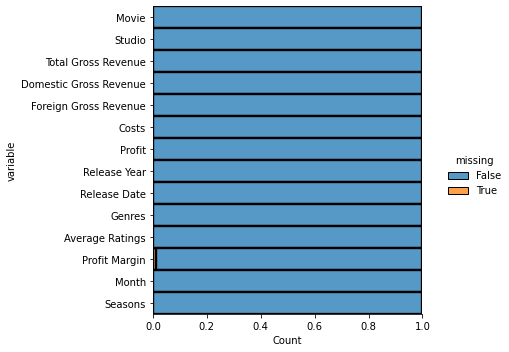

In [134]:
# confirm with visual for missing values
# Visualizing data for missing value
# As you can see, there are  missing values in 2 of the columns: genres, average ratings
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("missing_value_df.png", dpi=100)

In [135]:
# splitt the genres column and will just focus on one part of it
df[['Genres','other 1 Genres', 'Other 2 Genres']] = df['Genres'].str.split(',',expand=True)
#df['Genres'].str.split(',',expand=True)
df

,Movie,Studio,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Release Date,Genres,Average Ratings,Profit Margin,Month,Seasons,other 1 Genres,Other 2 Genres
0,10 Cloverfield Lane,Par.,108,72.082999,36.203423,5,103,2016,2016-03-11,Drama,7.2,0.953704,March,Spring,Horror,Mystery
1,12 Strong,WB,71,45.819713,25.298665,35,36,2018,2018-01-19,Action,6.6,0.507042,January,Winter,Drama,History
2,12 Years a Slave,FoxS,181,56.671993,124.353350,20,161,2013,2013-10-18,Biography,8.1,0.889503,October,Fall,Drama,History
3,127 Hours,FoxS,60,18.335230,41.881941,18,42,2010,2010-11-05,Adventure,7.6,0.700000,November,Fall,Biography,Drama
5,13 Sins,RTWC,0,0.009134,0.038418,4,-3,2014,2014-04-18,Horror,6.3,-inf,April,Spring,Thriller,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,Youth,FoxS,24,2.703296,21.298277,13,11,2015,2015-12-04,Drama,6.6,0.458333,December,Winter,Family,None
1249,Zero Dark Thirty,Sony,134,95.720716,38.891719,52,82,2012,2012-12-19,Drama,7.4,0.611940,December,Winter,Thriller,None
1250,Zookeeper,Sony,170,80.360866,90.444659,80,90,2011,2011-07-08,Comedy,5.2,0.529412,July,Summer,Family,Romance
1251,Zoolander 2,Par.,55,28.848693,26.500000,50,5,2016,2016-02-12,Comedy,4.7,0.090909,February,Winter,None,None


## Business Question / Recomendation 1

### How much on average should Computing Vision invest into producing profitable movies?

In [136]:
df.head()

,Movie,Studio,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Release Date,Genres,Average Ratings,Profit Margin,Month,Seasons,other 1 Genres,Other 2 Genres
0,10 Cloverfield Lane,Par.,108,72.082999,36.203423,5,103,2016,2016-03-11,Drama,7.2,0.953704,March,Spring,Horror,Mystery
1,12 Strong,WB,71,45.819713,25.298665,35,36,2018,2018-01-19,Action,6.6,0.507042,January,Winter,Drama,History
2,12 Years a Slave,FoxS,181,56.671993,124.353350,20,161,2013,2013-10-18,Biography,8.1,0.889503,October,Fall,Drama,History
3,127 Hours,FoxS,60,18.335230,41.881941,18,42,2010,2010-11-05,Adventure,7.6,0.700000,November,Fall,Biography,Drama
5,13 Sins,RTWC,0,0.009134,0.038418,4,-3,2014,2014-04-18,Horror,6.3,-inf,April,Spring,Thriller,None


In [137]:
# With a focus on profits, create a new df for profit making movies, profit >0  and sort it

profitable_movies = df.loc[df['Profit'] > 0]
profitable_ranked = profitable_movies.sort_values(by=['Profit'], ascending=False)
profitable_ranked.reset_index(inplace=True)
profitable_ranked.head(2)

,index,Movie,Studio,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Release Date,Genres,Average Ratings,Profit Margin,Month,Seasons,other 1 Genres,Other 2 Genres
0,97,Avengers: Infinity War,BV,2048,678.815482,1369.318718,300,1748,2018,2018-04-27,Action,8.5,0.853516,April,Spring,Adventure,Sci-Fi
1,479,Jurassic World,Uni.,1648,652.270625,996.584239,215,1433,2015,2015-06-12,Action,7.0,0.869539,June,Summer,Adventure,Sci-Fi


In [138]:
# summary statistics on profitable movies df- NT, release year is an odd one that should be ignored and so is the index
profitable_ranked.describe()

,index,Total Gross Revenue,Domestic Gross Revenue,Foreign Gross Revenue,Costs,Profit,Release Year,Average Ratings,Profit Margin
count,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,636.868217,200.842746,79.767917,121.578729,55.331118,145.458472,2013.740864,6.504762,0.636944
std,359.913505,259.111328,92.551680,176.025792,60.715249,214.474266,2.507497,0.980661,0.224596
min,0.000000,2.000000,0.000000,0.009606,0.000000,1.000000,2010.000000,1.600000,0.006623
25%,330.500000,44.000000,23.819057,17.310968,13.000000,21.000000,2012.000000,6.000000,0.508434
50%,643.000000,99.000000,48.071303,51.043254,32.000000,61.000000,2014.000000,6.600000,0.677419
75%,949.500000,244.500000,100.508826,145.330421,75.000000,166.000000,2016.000000,7.200000,0.805502
max,1252.000000,2048.000000,700.059566,1369.318718,410.000000,1748.000000,2018.000000,9.200000,1.000000


### The focus will be on the top 10 companies as these companies are making more profit/revenue on average as shown below

In [139]:
print(' Profitable movies' " ", profitable_ranked['Profit'].median() )# why we chose all profit making movies
print(' top 10 profitable movies' " ", profitable_ranked.loc[0:9, 'Profit'].median() )# why we chose first 10
print(' top 15 profitable movies' " ", profitable_ranked.loc[0:14, 'Profit'].median() )# why we chose first 15
print(' top 20 profitable movies' " ", profitable_ranked.loc[0:19, 'Profit'].median() )# why we chose first 20

 Profitable movies  61.0
 top 10 profitable movies  1128.5
 top 15 profitable movies  1072.0
 top 20 profitable movies  1000.5


In [140]:
print(' Profitable movies' " ", profitable_ranked['Profit'].mean() )# why we chose all profit making movies
print(' top 10 profitable movies' " ", profitable_ranked.loc[0:9, 'Profit'].mean() )# why we chose first 10
print(' top 15 profitable movies' " ", profitable_ranked.loc[0:14, 'Profit'].mean() )# why we chose first 15
print(' top 20 profitable movies' " ", profitable_ranked.loc[0:19, 'Profit'].mean() )# why we chose first 20

 Profitable movies  145.45847176079735
 top 10 profitable movies  1212.9
 top 15 profitable movies  1126.4
 top 20 profitable movies  1066.1


In [141]:
group_by_revenue= profitable_ranked.groupby(['Movie'], as_index=False)['Total Gross Revenue'].sum().sort_values(by='Total Gross Revenue', ascending=False)
group_by_revenue

,Movie,Total Gross Revenue
67,Avengers: Infinity War,2048
332,Jurassic World,1648
225,Furious 7,1518
66,Avengers: Age of Ultron,1403
91,Black Panther,1348
...,...,...
897,Your Sister's Sister,3
449,Obvious Child,3
372,Like Crazy,3
54,Another Earth,2


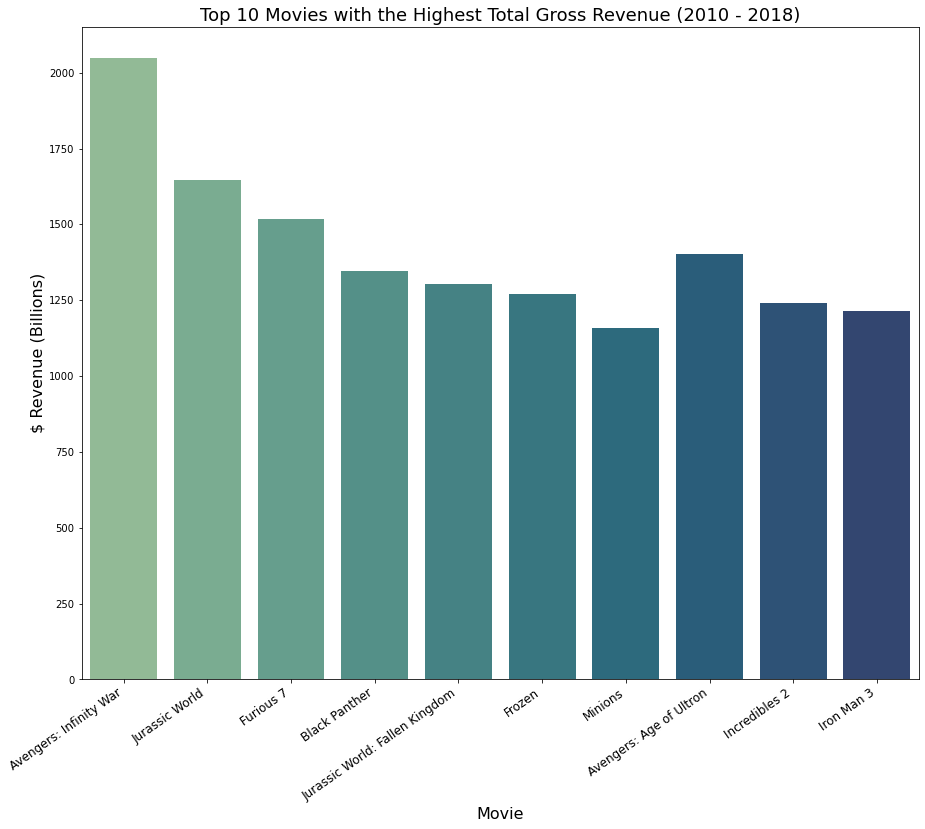

In [177]:
# Top 10 with the highest revenue generated 
plt.figure(figsize=(15,12))
#sns.color_palette("crest", as_cmap=True)
sns.barplot(x=profitable_ranked.loc[0:9, 'Movie'],y=profitable_ranked.loc[0:9, 'Total Gross Revenue'],data=profitable_ranked,palette="crest")
plt.xlabel('Movie', fontsize=16)
plt.title("Top 10 Movies with the Highest Total Gross Revenue (2010 - 2018)", fontsize=18)
plt.ylabel('$ Revenue (Billions)', fontsize=16)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
#plt.legend(fontsize=12)
plt.savefig('top10revenue');
plt.show()

In [143]:
group_by_rev= profitable_ranked.groupby(['Movie'], as_index=False)['Total Gross Revenue'].sum().sort_values(by='Total Gross Revenue', ascending=False)
group_by_rev

,Movie,Total Gross Revenue
67,Avengers: Infinity War,2048
332,Jurassic World,1648
225,Furious 7,1518
66,Avengers: Age of Ultron,1403
91,Black Panther,1348
...,...,...
897,Your Sister's Sister,3
449,Obvious Child,3
372,Like Crazy,3
54,Another Earth,2


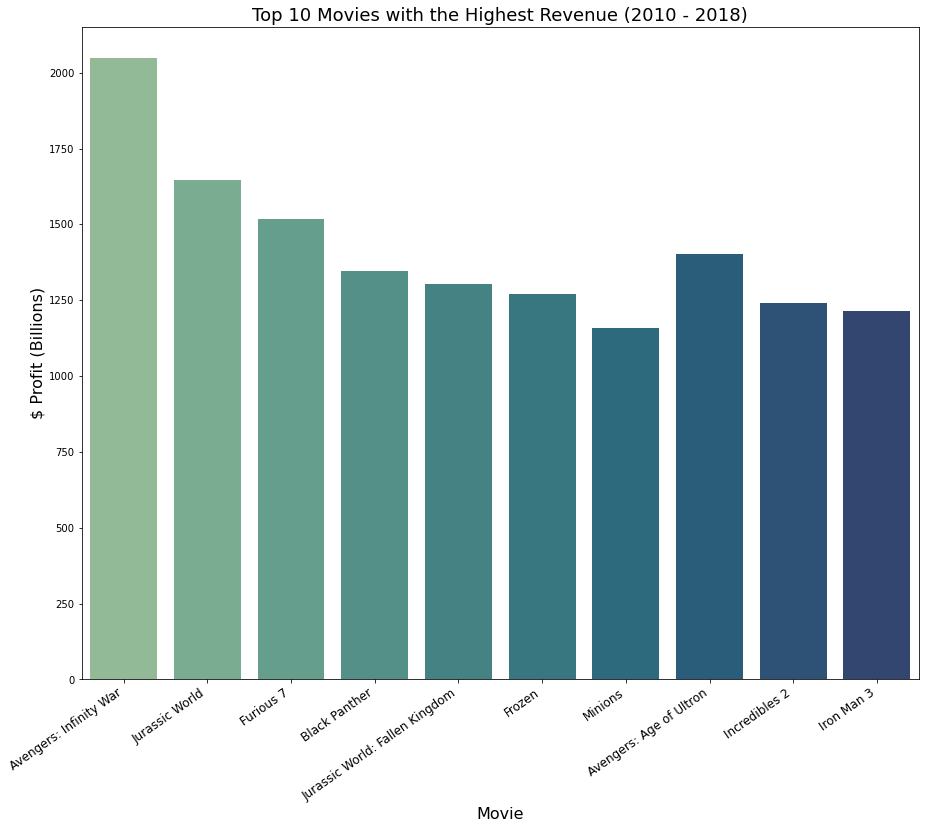

In [178]:
# Top 10 Movies with the highest revenue 
plt.figure(figsize=(15,12))
#sns.color_palette("crest", as_cmap=True)
sns.barplot(x=profitable_ranked.loc[0:9, 'Movie'],y=profitable_ranked.loc[0:9, 'Total Gross Revenue'],data=profitable_ranked,palette="crest")
plt.xlabel('Movie', fontsize=16)
plt.title("Top 10 Movies with the Highest Revenue (2010 - 2018)", fontsize=18)
plt.ylabel('$ Profit (Billions)', fontsize=16)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
#plt.legend(fontsize=12)
plt.savefig('top10rev');
plt.show()

In [145]:
group_by_prof= profitable_ranked.groupby(['Movie'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)
group_by_prof

,Movie,Profit
67,Avengers: Infinity War,1748
332,Jurassic World,1433
225,Furious 7,1328
91,Black Panther,1148
333,Jurassic World: Fallen Kingdom,1135
...,...,...
556,Shut In,1
54,Another Earth,1
221,Friend Request,1
112,Can You Ever Forgive Me?,1


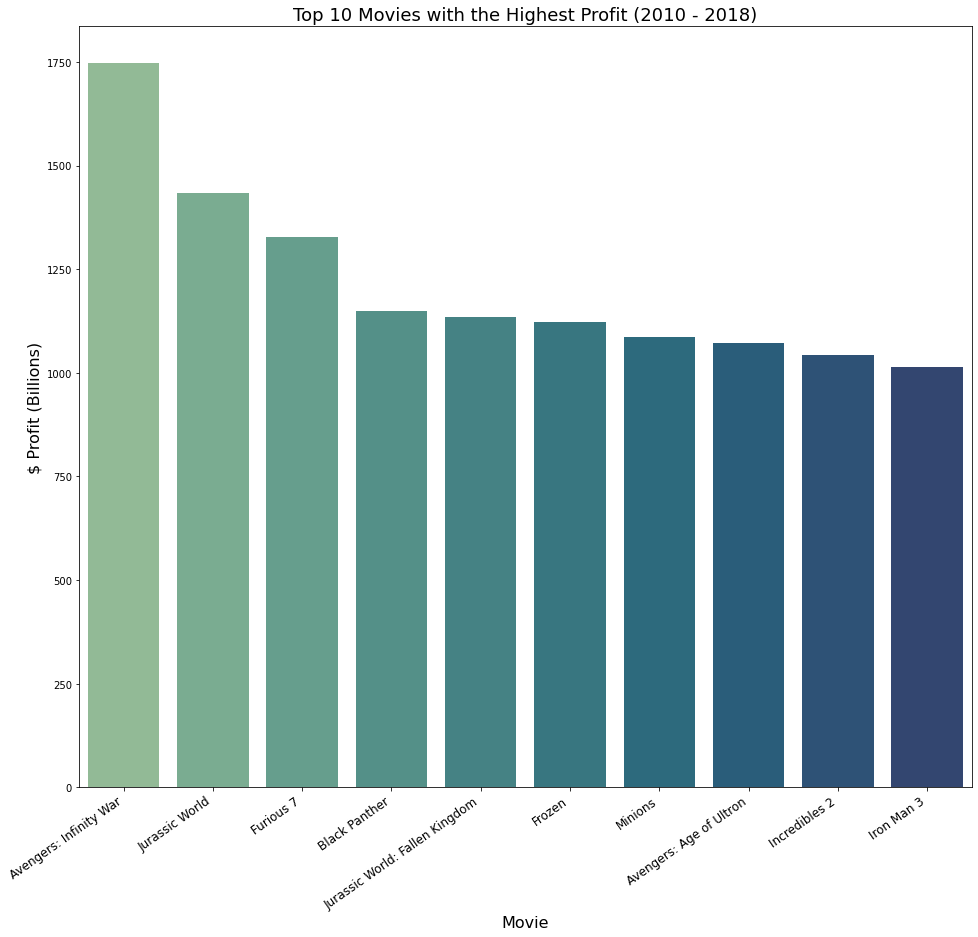

In [179]:
# Top 10 profitable Movies 
plt.figure(figsize=(16,14))
#sns.color_palette("crest", as_cmap=True)
sns.barplot(x=profitable_ranked.loc[0:9, 'Movie'],y=profitable_ranked.loc[0:9, 'Profit'],data=profitable_ranked,palette="crest")
plt.xlabel('Movie', fontsize=16)
plt.title("Top 10 Movies with the Highest Profit (2010 - 2018)", fontsize=18)
plt.ylabel('$ Profit (Billions)', fontsize=16)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
#plt.legend(fontsize=12)
plt.savefig('top10prof');
plt.show()

In [147]:
# group studio by total gross revenue and profit and save in a df
b=profitable_ranked.groupby('Studio', as_index=False)[['Total Gross Revenue']].sum().sort_values(by='Total Gross Revenue',  ascending=False)
d=profitable_ranked.groupby('Studio', as_index=False)[['Profit']].sum().sort_values(by='Profit',  ascending=False)

In [148]:
# pick the top 10 studios with the highest total gross revenue and profit
c= b.nlargest(n=10, columns=['Total Gross Revenue'])
c

,Studio,Total Gross Revenue
7,BV,32290
53,Uni.,26380
17,Fox,26188
55,WB,23372
48,Sony,16730
39,Par.,13284
56,WB (NL),8557
24,LGF,6422
36,P/DW,5050
23,LG/S,2919


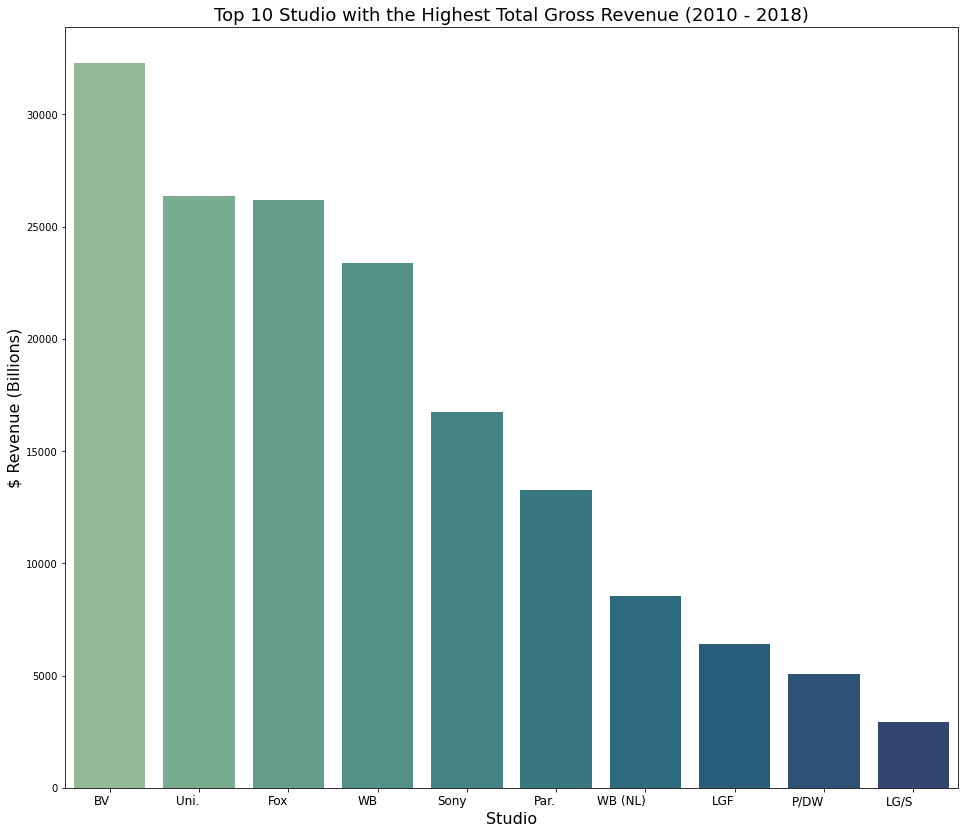

In [181]:
# Plot Studios with the highest Total gross revenue- top 10
plt.figure(figsize=(16,14))
sns.barplot(x='Studio',y='Total Gross Revenue',data=c,palette="crest")
plt.xlabel('Studio', fontsize=16)
plt.title("Top 10 Studio with the Highest Total Gross Revenue (2010 - 2018)", fontsize=18)
plt.ylabel('$ Revenue (Billions)', fontsize=16)
plt.xticks(rotation=0, horizontalalignment='right', fontsize=12)
#plt.legend(fontsize=12)
plt.savefig('top10revenue_studio');
plt.show()

In [150]:
e=d.nlargest(n=10, columns=['Profit'])
e

,Studio,Profit
7,BV,23482
53,Uni.,20981
17,Fox,18899
55,WB,15389
48,Sony,12100
39,Par.,9239
56,WB (NL),6501
24,LGF,4684
36,P/DW,3756
23,LG/S,1948


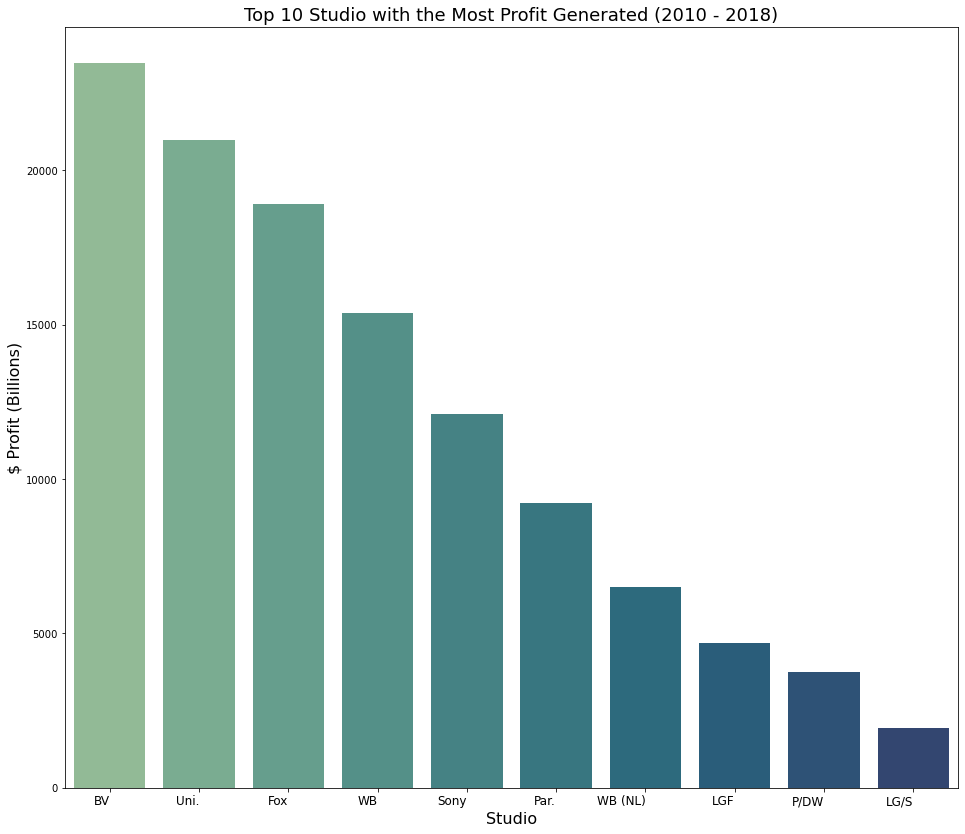

In [182]:
# Plot Studio with the  most profit generated 
plt.figure(figsize=(16,14))
#sns.color_palette("crest", as_cmap=True)
sns.barplot(x='Studio',y='Profit',data=e,palette="crest")
plt.xlabel('Studio', fontsize=16)
plt.title("Top 10 Studio with the Most Profit Generated (2010 - 2018)", fontsize=18)
plt.ylabel('$ Profit (Billions)', fontsize=16)
plt.xticks(rotation=0, horizontalalignment='right', fontsize=12)
#plt.legend(fontsize=12)
plt.savefig('top10profit_stdio');
plt.show()

In [152]:
# Understand how much these top 10 studios are investing to be earning such huge profits
#On average, the top 10 companies invest about 
f=profitable_ranked.groupby('Studio', as_index=False)[['Costs']].sum().sort_values(by='Costs',  ascending=False)
f=f.nlargest(n=10, columns=['Costs'])
f['Costs'].median()

4337.5

In [153]:
f.describe()

,Costs
count,10.000000
mean,4419.500000
std,2901.373094
min,970.000000
25%,1811.500000
50%,4337.500000
75%,6814.750000
max,8805.000000


### Final Business Recommendation

- Based on our analysis, the top 10 movies have raked in on average about 1.4 billion dollars in Revenue and about 1.2 billion dollars in Porfit with an average budget/cosyt of about 440 million dollars. Thus, should Computer Vision decide to go into producing movies, the company should budget between 440 millions and 680 million dollars.

## Business Question 2

### What genres of movies should Computing Vision focus on based on total realized profits and profit?

In [183]:
# group grenres by Total  Profit
genres_group_rev=profitable_ranked.groupby('Genres', as_index=False)[['Seasons','Total Gross Revenue',]].sum().sort_values(by='Total Gross Revenue',  ascending=False)
genres_group_rev

,Genres,Total Gross Revenue
0,Action,92156
1,Adventure,38929
4,Comedy,17754
7,Drama,11802
3,Biography,7230
9,Horror,5251
5,Crime,3515
2,Animation,2457
6,Documentary,1065
10,Mystery,711


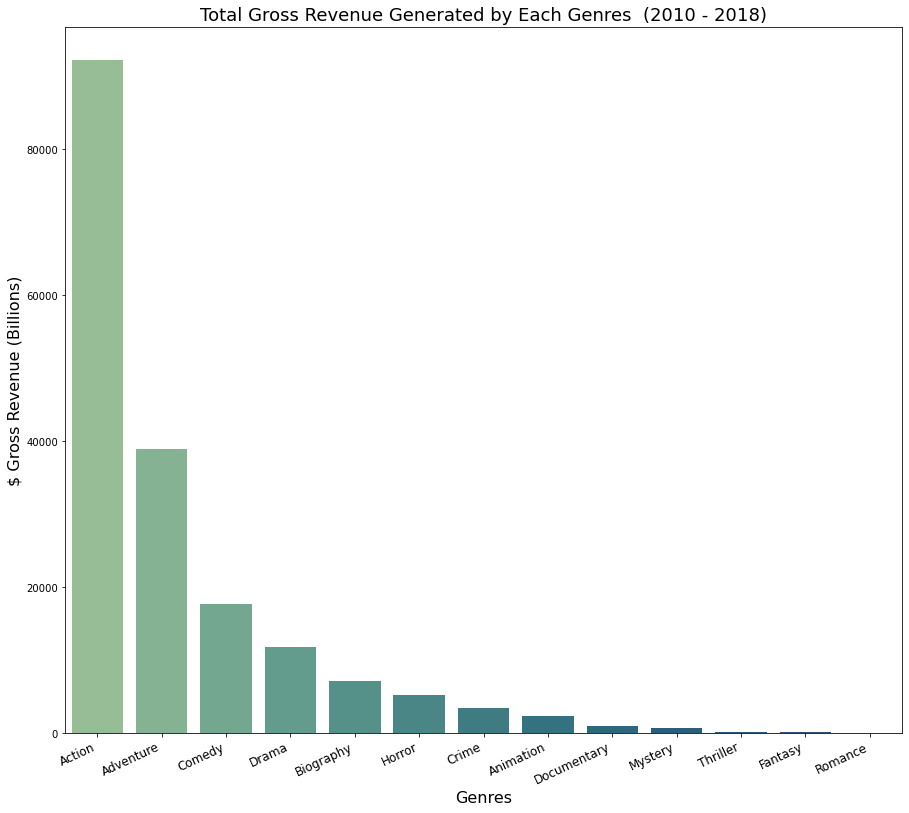

In [191]:
# Plot genres with the most total gross revenue
plt.figure(figsize=(15,13))
#sns.color_palette("crest", as_cmap=True)
sns.barplot(x='Genres',y='Total Gross Revenue',data=genres_group_rev,palette="crest")
plt.xlabel('Genres', fontsize=16)
plt.title("Total Gross Revenue Generated by Each Genres  (2010 - 2018)", fontsize=18)
plt.ylabel('$ Gross Revenue (Billions)', fontsize=16)
plt.xticks(rotation=25, horizontalalignment='right', fontsize=12)
#plt.legend(fontsize=12)
plt.savefig('genres_prof');
plt.show()

In [157]:
# group grenres by Total  Profit
genres_group_prof=profitable_ranked.groupby('Genres', as_index=False)[['Seasons','Profit',]].sum().sort_values(by='Profit',  ascending=False)
genres_group_prof

,Genres,Profit
0,Action,65244
1,Adventure,28335
4,Comedy,12752
7,Drama,8791
3,Biography,5514
9,Horror,4616
5,Crime,2439
2,Animation,1979
6,Documentary,846
10,Mystery,554


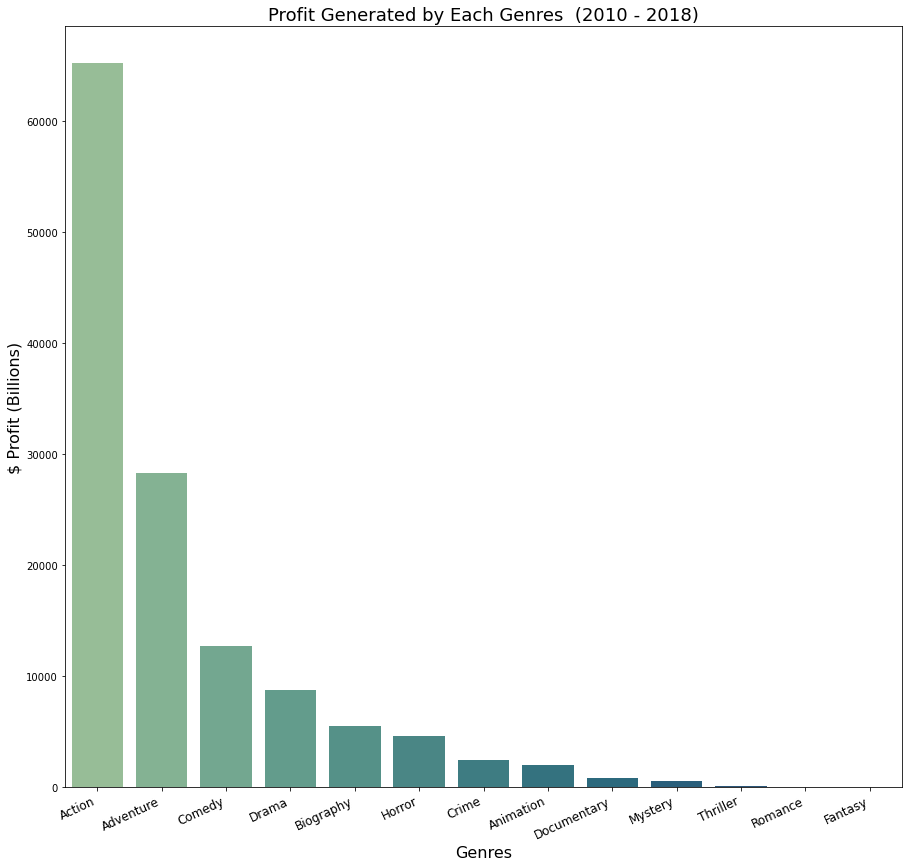

In [187]:
# Plot genres with the  most revenue generated 
plt.figure(figsize=(15,14))
#sns.color_palette("crest", as_cmap=True)
sns.barplot(x='Genres',y='Profit',data=genres_group_prof,palette="crest")
plt.xlabel('Genres', fontsize=16)
plt.title("Profit Generated by Each Genres  (2010 - 2018)", fontsize=18)
plt.ylabel('$ Profit (Billions)', fontsize=16)
plt.xticks(rotation=25, horizontalalignment='right', fontsize=12)
#plt.legend(fontsize=12)
plt.savefig('genres_prof');
plt.show()

### Final Business Recommendation

- Movies that are in the 'Action' Genre, by far have the highest generated reveneues and profitablility. 

## Business Recomendation 3

### What is the best season for Computing Vision to release movies?

In [160]:
#Count of all profitable movies produced in each season from 2010-2018
seasons_count= profitable_ranked.groupby(['Seasons'], as_index=False)[['Movie',]].count().sort_values(by='Movie',  ascending=False)
seasons_count

,Seasons,Movie
0,Fall,248
2,Summer,245
3,Winter,208
1,Spring,202


In [161]:
#Group by seasons ny Total revenue
revenue_by_season= profitable_ranked.groupby(['Seasons'], as_index=False)['Total Gross Revenue'].sum().sort_values(by='Total Gross Revenue', ascending=False)
revenue_by_season

,Seasons,Total Gross Revenue
2,Summer,58626
1,Spring,44292
0,Fall,41360
3,Winter,37083


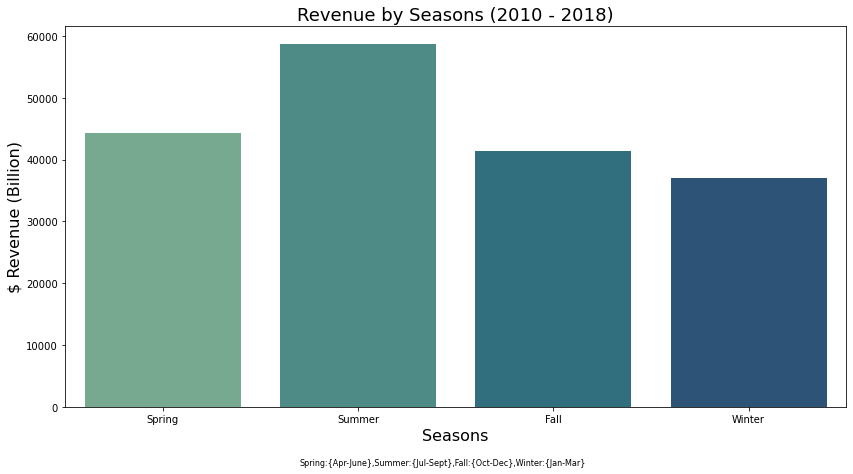

<Figure size 432x288 with 0 Axes>

In [162]:
#Plot seasons by revenue.
plt.figure(figsize=(14,7))
sns.barplot(x=revenue_by_season['Seasons'], y = revenue_by_season['Total Gross Revenue'], palette='crest',
                   order=['Spring','Summer','Fall','Winter'])
plt.xlabel('Seasons', fontsize=16)
plt.ylabel('$ Revenue (Billion)', fontsize=16)
plt.title('Revenue by Seasons (2010 - 2018)', fontsize=18)
plt.figtext(0.5, 0.01, "Spring:{Apr-June},Summer:{Jul-Sept},Fall:{Oct-Dec},Winter:{Jan-Mar}", ha="center", fontsize=8)
plt.show()
plt.savefig('Revenue_seasons');

In [163]:
#Group by seasons by Profit
profit_by_season= profitable_ranked.groupby(['Seasons'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)
profit_by_season

,Seasons,Profit
2,Summer,43109
1,Spring,31142
0,Fall,29765
3,Winter,27333


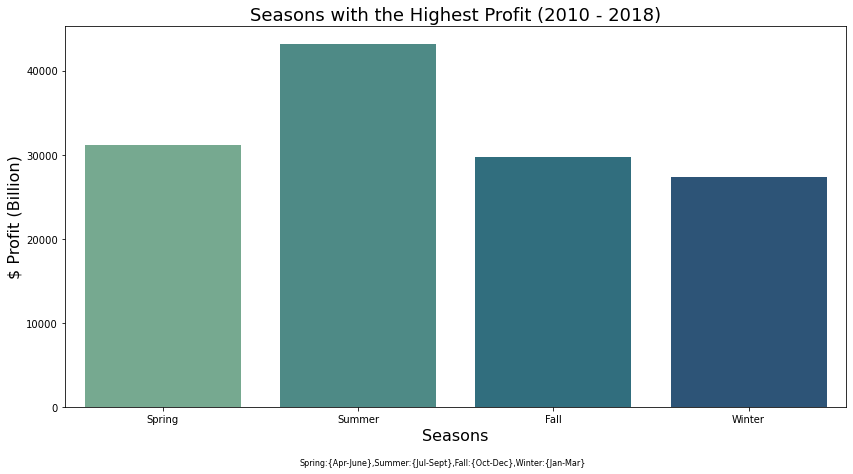

<Figure size 432x288 with 0 Axes>

In [164]:
#Plot seasons by profit.
plt.figure(figsize=(14,7))
sns.barplot(x=profit_by_season['Seasons'], y = profit_by_season['Profit'], palette='crest',
                   order=['Spring','Summer','Fall','Winter'])
plt.xlabel('Seasons', fontsize=16)
plt.ylabel('$ Profit (Billion)', fontsize=16)
plt.title('Seasons with the Highest Profit (2010 - 2018)', fontsize=18)
plt.figtext(0.5, 0.01, "Spring:{Apr-June},Summer:{Jul-Sept},Fall:{Oct-Dec},Winter:{Jan-Mar}", ha="center", fontsize=8)
plt.show()
plt.savefig('Season_movies_by_profit');

In [166]:
# create a dataframe of only summer data and group by profit
seasons_summer=profitable_movies[profitable_movies['Seasons']=='Summer']
seasons_summer_grp= seasons_summer.groupby(['Month'], as_index=False)['Profit'].sum().sort_values(by='Profit', ascending=False)
seasons_summer_grp

,Month,Profit
2,June,19839
1,July,16719
0,August,6551


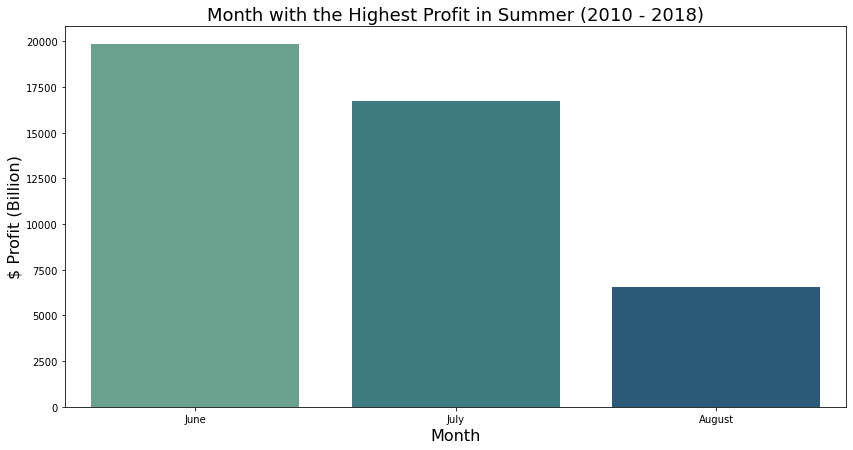

<Figure size 432x288 with 0 Axes>

In [168]:
#Plot seasons by profit.
plt.figure(figsize=(14,7))
sns.barplot(x=seasons_summer_grp['Month'], y = seasons_summer_grp['Profit'], palette='crest')
plt.xlabel('Month', fontsize=16)
plt.ylabel('$ Profit (Billion)', fontsize=16)
plt.title('Month with the Highest Profit in Summer (2010 - 2018)', fontsize=18)
plt.show()
plt.savefig('Month_profit');

In [169]:
# cross tabs between movies genres and seasons
pd.crosstab(profitable_ranked.Seasons, profitable_ranked.Genres,margins=True)

Genres,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Mystery,Romance,Thriller,All
Seasons,,,,,,,,,,,,,,
Fall,58,35,3,29,39,18,1,47,0,16,0,0,2,248
Spring,67,23,1,9,51,7,5,25,1,11,1,1,0,202
Summer,92,36,1,9,54,7,3,30,1,11,1,0,0,245
Winter,64,23,1,19,44,4,3,35,1,13,1,0,0,208
All,281,117,6,66,188,36,12,137,3,51,3,1,2,903


### Final Business Recommendation

- We find that movies released in the Summer months ("Summer blockbuster season") generate the most total revenue .

# Hypothesis testing on Business Question 3

In [170]:
chisqt = pd.crosstab(profitable_ranked.Genres, profitable_ranked.Seasons, margins=True)
print(chi2_contingency(chisqt)[0:3])
# create contingency table
data_crosstab = pd.crosstab(profitable_ranked['Seasons'],
                            profitable_ranked['Genres'],
                           margins=True, margins_name="Total")

# Significance level
alpha = 0.05

# Calcualtion of Chisquare
chi_square = 0
rows = profitable_ranked['Seasons'].unique()
columns =  profitable_ranked['Genres'].unique()
for i in columns:
    for j in rows:
        O = data_crosstab[i][j]
        E = data_crosstab[i]['Total'] * data_crosstab['Total'][j] / data_crosstab['Total']['Total']
        chi_square += (O-E)**2/E

# Finding the p-value and conclusion
p_value = 1 - stats.chi2.cdf(chi_square, (len(rows)-1)*(len(columns)-1))
conclusion = "Failed to reject the null hypothesis."
if p_value <= alpha:
    conclusion = "Null Hypothesis is rejected."
        
print("chisquare-score is:", chi_square, " and p value is:", p_value)
print(conclusion)

(61.63932102339934, 0.16931172914761175, 52)
chisquare-score is: 61.63932102339934  and p value is: 0.004930739065949097
Null Hypothesis is rejected.


### H0: There is no link between type the type of genres been released and season.

### H1: There is an association between the type of genres been released and season.

### Based on the p-value, there is not enough evidence to accept the null hypothesis. This means that there is an assocaition between the season and the the type of movie genres

-NB that: the chi-square can only determine whether two variables are related. It does not necessarily follow that one -variable has a causal relationship with the other. It would require a more detailed analysis to establish causality.

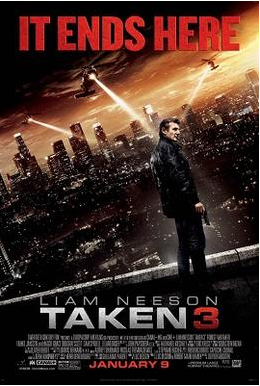